# 3. Hafta Lab-4:kNN - Karar Sınırları
## BGM 565: Siber Güvenlik için Makine Öğrenme Yöntemleri
## İstanbul Şehir Üni. - Bilgi Güvenliği Müh.
### Dr. Ferhat Özgür Çatak
Bu lab çalışmasında k en yakın komşu algoritmasını KDDCUP'99 veri kümesine uygulayacağız.

In [2]:
import numpy as np
import pandas as pd
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.metrics import accuracy_score

import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

KDDCUP'99 veri kumesini oku

In [3]:
# veri kumesini oku
kolon_adlari = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
'dst_host_srv_rerror_rate','label']

verikumesi = pd.read_csv("kddcup99.tar.gz",compression="gzip", names=kolon_adlari, 
low_memory=False, skiprows=1)

Sadece *count* ve *srv_count* seçerek veri kümesini görsel hale getirelim.

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


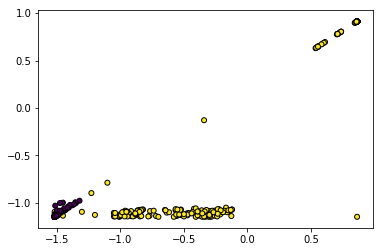

In [4]:
np.random.seed(20)
# ilgili kolonlari sec
secilecek_kolonlar = ['count','srv_count']

verikumesi = verikumesi.sample(1000)

X = verikumesi[secilecek_kolonlar].as_matrix()
y = verikumesi['label'].apply(lambda d:0 if d == 'normal.' else 1).as_matrix()

# Veriyi normalize et
X = preprocessing.scale(X)

# Egitim ve test veri kumeleri olustur
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,  s=25, edgecolor='k')

Modeli egit

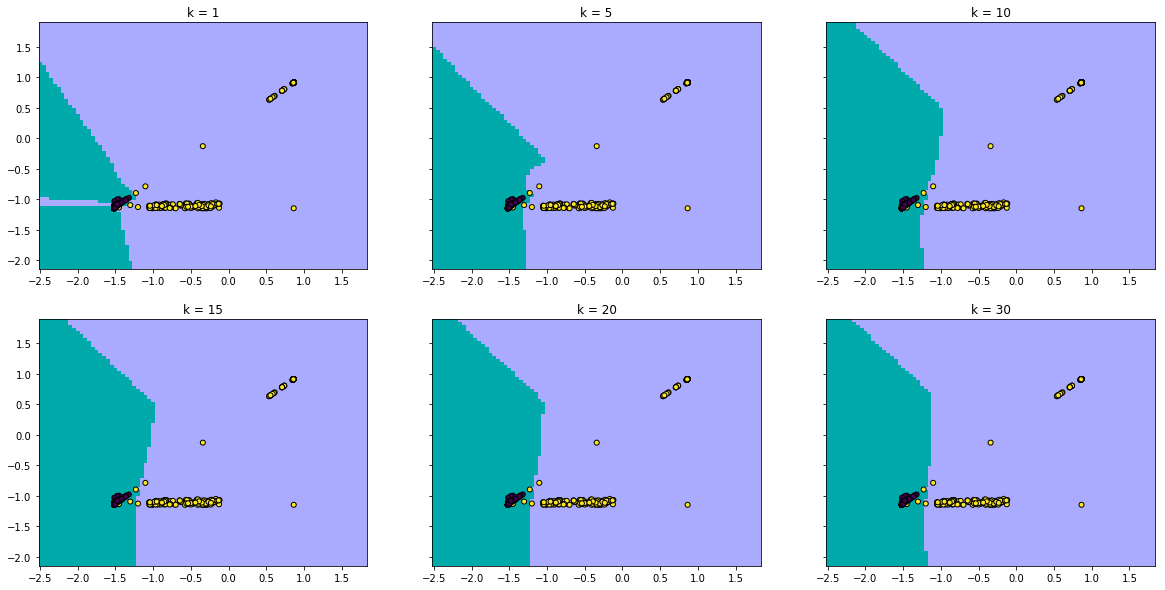

In [7]:
k_values = [1, 5, 10, 15, 20, 30]
cmap_light = ListedColormap(['#00AAAA', '#00FFAA', '#AAAAFF'])

def plot_boundary(ax, k):
    clf = neighbors.KNeighborsClassifier(k, weights='distance')
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
    ax.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train ,s=25, edgecolor='k')
    ax.set_title("k = " + str(k))
    

## Karar sinirlari baslangic ve bitis
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

## koordinat vektorlerinden koordinat matrisi olustur
#coordinate matrices from coordinate vectors.
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

f, axes = plt.subplots(2, 3, sharey=True, figsize=(20, 10))



plot_boundary(axes[0,0], 1)
plot_boundary(axes[0,1], 5)
plot_boundary(axes[0,2], 10)
plot_boundary(axes[1,0], 15)
plot_boundary(axes[1,1], 20)
plot_boundary(axes[1,2], 30)

plt.show()


$k$ değeri ve doğruluk

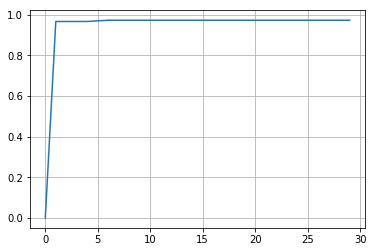

In [5]:
num_of_k = 30
#k'ya gore model siniflandirma performans sonuclari
k_accuracy = np.zeros((num_of_k,1))
for k in range(1,num_of_k):
    clf = neighbors.KNeighborsClassifier(k, weights='distance')
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    acc = accuracy_score(y_test, y_hat)
    k_accuracy[k] = acc
plt.plot(k_accuracy)
plt.grid()
plt.show()